In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

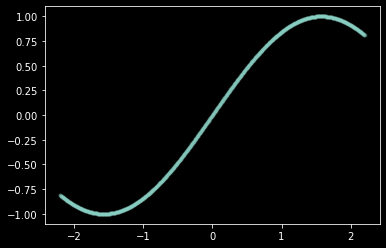

In [2]:
x = np.linspace(-0.7*np.pi, 0.7*np.pi, 1000)
y = np.sin(x)
plt.plot(x, y, '.', alpha=0.25)
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

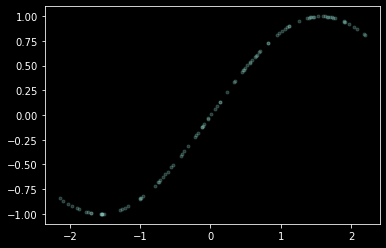

In [4]:
plt.plot(x_test, y_test, '.', alpha=0.25)
plt.show()

In [5]:
x_train, y_train = torch.Tensor(x_train).float(), torch.Tensor(y_train).float()
x_test, y_test = torch.Tensor(x_test).float(), torch.Tensor(y_test).float()

In [6]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

input_size = 1
hidden_size = 64
output_size = 1

model = NN(input_size, hidden_size, output_size)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(x_train.view(-1, 1), y_train.view(-1, 1))
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

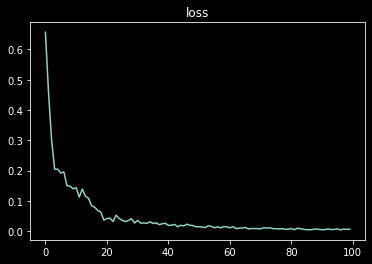

In [7]:
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

plt.title('loss')
plt.plot(losses)
plt.show()

In [8]:
with torch.no_grad():
    model.eval()
    predictions = model(x_test.view(-1, 1))
    mae = torch.mean(torch.abs(predictions-y_test.view(-1, 1)))
    print(f'MAE: {mae.item():.6f}')

MAE: 0.004084


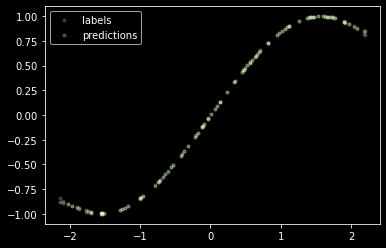

In [9]:
prd = predictions.numpy().ravel()

plt.plot(x_test.numpy(), y_test.numpy(), '.', alpha=0.25, label='labels')
plt.plot(x_test.numpy(), prd, '.', alpha = 0.25, label='predictions')
plt.legend()
plt.show()